# Describing a single set of data

You have the following dataset from a social media network: the number of connections for each user

> num_friends = [100, 49, 41, 40, 25, ...]

- One simple way to descibe the dataset is to simply show the values
    - For small enough datasets, this may actually be the most insightful presentation of the data
    - **But for larger datasets, it may not tell you much (too much information)**

- Another way we can display the data is by using a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5dea197cc0>]], dtype=object)

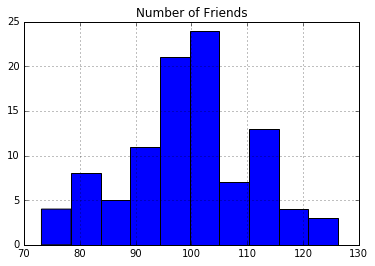

In [4]:
#generating a random list of friend counts for a set of 100 users
import numpy as np
import pandas as pd
%matplotlib inline
num_friends = np.random.normal(loc = 100, scale = 10, size = 100)
pd.DataFrame(num_friends, columns = ['Number of Friends']).hist()

- We may also want to know max, min, standard deviation, mean, etc.

In [5]:
pd.DataFrame(num_friends).describe()

,0
count,100.000000
mean,99.382981
std,11.516077
min,73.136413
25%,93.710371
50%,99.764592
75%,106.236583
max,126.282136


# Correlation

- For random variables X and Y, recall that the correlation between the two is defined as:

### $\text{Corr(X,Y)} = \rho_{X, Y} = \frac{\text{Covariance(X,Y)}}{\sigma_{X}\cdot \sigma_{Y}}$

- And Covariance is defined as:

### $\text{Covariance(X,Y)} = \frac{\sum{[(x_{i} - \bar x)\cdot(y_{i} - \bar y)]}}{n-1}$


- Let's do an example:

In [11]:
#building a dataframe of random values
df = pd.DataFrame({'X':np.random.randint(1,20,size = 100), 'Y': np.random.normal(loc = 10, scale = 3, size = 100)})
#looking at the first 20 rows
df.head(20)

,X,Y
0,12,11.215338
1,10,11.291868
2,5,9.980633
3,1,10.180488
4,11,6.016460
5,15,14.081395
6,10,9.748520
7,14,3.801031
8,15,8.521046
9,1,15.798395


- We want to know if X and Y are correlated

- First things first: we need to calculate the mean for X and Y

In [14]:
x_bar = df['X'].mean()
y_bar = df['Y'].mean()
x_bar, y_bar

(9.98, 10.221338134044679)

- Now, we can calculate the distance from x_bar and y_bar for the X and Y columns

In [16]:
df['x - x_bar'] = df['X'] - x_bar
df['y - y_bar'] = df['Y'] - y_bar
df.head()

,X,Y,x - x_bar,y - y_bar
0,12,11.215338,2.02,0.994000
1,10,11.291868,0.02,1.070530
2,5,9.980633,-4.98,-0.240705
3,1,10.180488,-8.98,-0.040850
4,11,6.016460,1.02,-4.204878


- From here, we can calculate everything else we need

- The numberator for covariance is just the sum of $\text{df['x - x_bar']}\cdot \text{df['y - y_bar']}$

In [18]:
numerator = (df['x - x_bar']*df['y - y_bar']).sum()
numerator

-237.22505120813028

- And the denominator is $n$ i.e. the number of points i.e. the length of the dataframe so:

In [22]:
covariance = numerator/(len(df)-1)
covariance

-2.3962126384659626

- We can double check this value using the built in covariance function for pandas

In [23]:
df[['X','Y']].cov()

,X,Y
X,26.625859,-2.396213
Y,-2.396213,9.237380


- The same!

- So now, to calculate the correlation, we just need to solve for the standard deviations
    - **Since the variance is just the mean squared error, we can just use $\text{df['x - x_bar']}$ and $\text{df['y - y_bar']}$**

In [33]:
sigma_x = ((df['x - x_bar']**2).sum()/(len(df)-1))**0.5
sigma_y = ((df['y - y_bar']**2).sum()/(len(df)-1))**0.5
sigma_x, sigma_y

(5.160025056708406, 3.0393058342116186)

- We can double check these values using the built in std functions

In [34]:
df['X'].std(), df['Y'].std()

(5.160025056708406, 3.0393058342116186)

- The same!

### Putting it all together!

In [37]:
correlation = covariance/(sigma_x*sigma_y)
correlation

-0.15279148088431155

- Checking this value using the built in corr function

In [38]:
df[['X','Y']].corr()

,X,Y
X,1.000000,-0.152791
Y,-0.152791,1.000000


- The same!

## But what does correlation mean after all?

- For a correlation of 0.5, it means that if X goes up by 10% of its value, Y will go up by 0.5*10% = 5% of its value

- By dividing by $\sigma_{X}$ and $\sigma_{Y}$, you control for the units of X and Y and only look at how they change relative to one another **proportion-wise**

# Simpson's Paradox

### Simpson's paradox, or the Yule–Simpson effect, is a phenomenon in probability and statistics, in which a trend appears in different groups of data but disappears or reverses when these groups are combined.

### Example: UC Berkley Admissions

One of the best-known examples of Simpson's paradox is a study of gender bias among graduate school admissions to University of California, Berkeley. The admission figures for the fall of 1973 showed that men applying were more likely than women to be admitted, and the difference was so large that it was unlikely to be due to chance

|           | **Applicants** | **Admitted** |
|-----------|----------------|--------------|
| **Men**   | 8442           | **44%**      |
| **Women** | 4321           | 35%          |


**It clearly looks like MEN are being favored**

But then looking at the data, but separated by department:

| **Department** |**M: Applicants**|**M: Acceptance %**|**W: Applicants**|**W: Acceptance %**|
|----------------|----------------|--------------|----------------|--------------|
| **A**          | 825            | 62%          | 108            | **82%**      |
| **B**          | 560            | 63%          |  25            | **68%**      |
| **C**          | 325            | **37%**      | 593            | 34%          |
| **D**          | 417            | 33%          | 375            | **35%**      |
| **E**          | 191            | **28%**      | 393            | 24%          |
| **F**          | 373            |  6%          | 341            |  **7%**      |

- Now the data has flipped
    - The female applicants were more likely to be accepted in 4 of 6 departments
    
**So now, it looks like WOMEN are being favored**


#### Key Issue: we're assuming we can compare variables with ALL ELSE BEING EQUAL
- This assumption isn't always true

#### How to avoid this issue: KNOW YOUR DATA